# This notebook performs an in-depth exploratory data analysis (EDA) on the **AI LLM summarization dataset**, which contains manually curated `text` and `summary` pairs. The goal is to understand the structure, content, and characteristics of the dataset before using it for training a large language model (LLM) for abstractive summarization.


# Imports

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import spacy

# EDA

## Load the Datase

In [27]:
df = pd.read_csv('ai_llm_texts_extended.csv')

## Basic Statistics

In [29]:
print("Basic Dataset Info:")
print(f"Total entries: {len(df)}")
print(f"Columns: {df.columns.tolist()}")
print("\nMissing values:")
print(df.isnull().sum())

Basic Dataset Info:
Total entries: 20
Columns: ['text', 'summary']

Missing values:
text       0
summary    0
dtype: int64


## Text Length Analysis

In [32]:
df['text_length'] = df['text'].apply(len)
df['summary_length'] = df['summary'].apply(len)
print("Text Length Statistics (characters):")
print(df[['text_length', 'summary_length']].describe())


Text Length Statistics (characters):
       text_length  summary_length
count    20.000000       20.000000
mean    638.900000      163.350000
std     184.717679       30.349326
min     494.000000      138.000000
25%     536.000000      144.750000
50%     570.500000      157.000000
75%     626.500000      166.250000
max    1178.000000      250.000000


## Word Count Analysis

[]

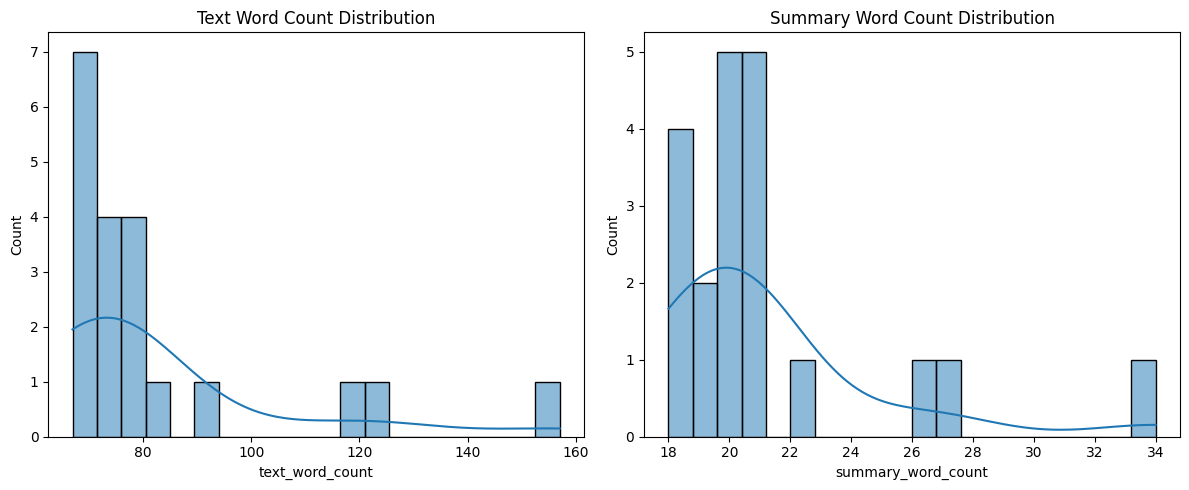

In [33]:
df['text_word_count'] = df['text'].apply(lambda x: len(x.split()))
df['summary_word_count'] = df['summary'].apply(lambda x: len(x.split()))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['text_word_count'], bins=20, kde=True)
plt.title('Text Word Count Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['summary_word_count'], bins=20, kde=True)
plt.title('Summary Word Count Distribution')
plt.tight_layout()
plt.savefig('word_count_distribution.png')
plt.plot()

## Vocabulary Analysis

[]

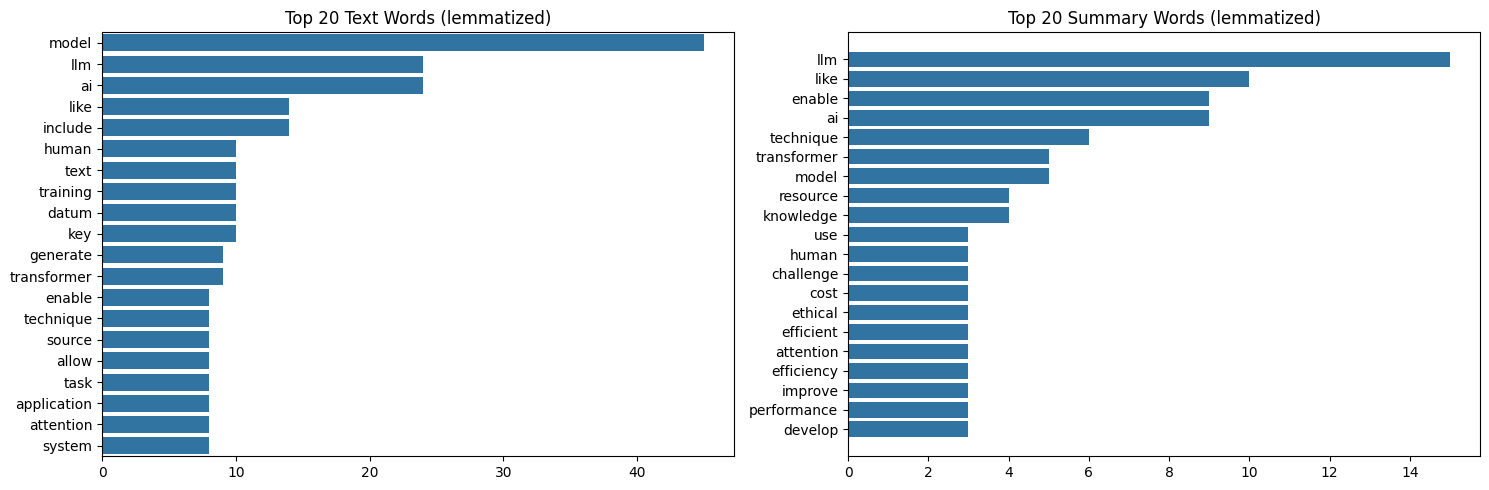

In [34]:
nlp = spacy.load('en_core_web_sm')
def preprocess_text(text):
    doc = nlp(text.lower())
    return [token.lemma_ for token in doc if not token.is_stop and not token.is_punct and token.is_alpha]

all_text_words = [word for text in df['text'] for word in preprocess_text(text)]
text_word_freq = Counter(all_text_words).most_common(20)

all_summary_words = [word for summary in df['summary'] for word in preprocess_text(summary)]
summary_word_freq = Counter(all_summary_words).most_common(20)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=[count for word, count in text_word_freq], y=[word for word, count in text_word_freq])
plt.title('Top 20 Text Words (lemmatized)')

plt.subplot(1, 2, 2)
sns.barplot(x=[count for word, count in summary_word_freq], y=[word for word, count in summary_word_freq])
plt.title('Top 20 Summary Words (lemmatized)')
plt.tight_layout()
plt.savefig('word_frequency.png')
plt.plot()

## Word clouds

[]

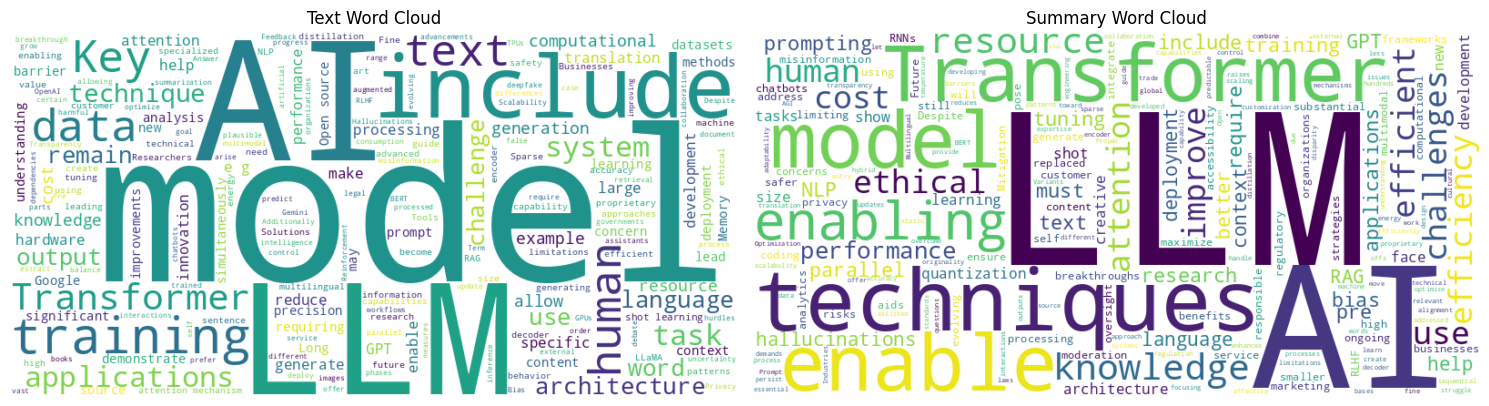

In [35]:
text_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['text']))
summary_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['summary']))

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.imshow(text_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Text Word Cloud')

plt.subplot(1, 2, 2)
plt.imshow(summary_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Summary Word Cloud')
plt.tight_layout()
plt.savefig('wordclouds.png')
plt.plot()


## Text-Summary Similarity Analysis

[]

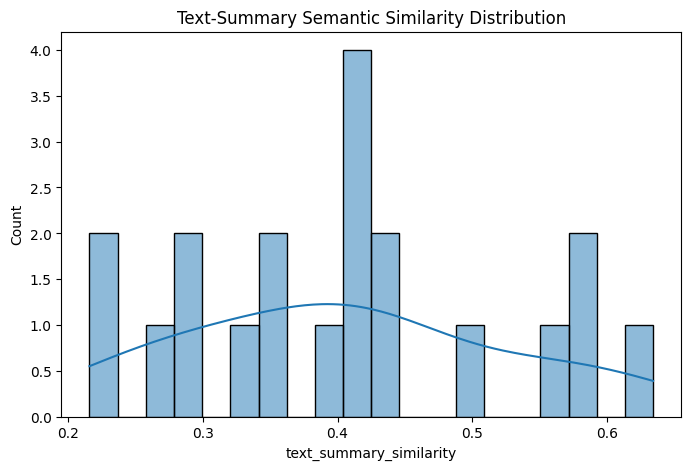

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

vectorizer = TfidfVectorizer()
text_vectors = vectorizer.fit_transform(df['text'])
summary_vectors = vectorizer.transform(df['summary'])

similarities = [cosine_similarity(text_vectors[i], summary_vectors[i])[0][0] for i in range(len(df))]
df['text_summary_similarity'] = similarities

plt.figure(figsize=(8, 5))
sns.histplot(df['text_summary_similarity'], bins=20, kde=True)
plt.title('Text-Summary Semantic Similarity Distribution')
plt.savefig('similarity_distribution.png')
plt.plot()

## Key Findings Report

In [39]:
print("Key EDA Findings:")
print(f"- Average text length: {df['text_word_count'].mean():.0f} words")
print(f"- Average summary length: {df['summary_word_count'].mean():.0f} words")
print(f"- Most common text word: '{text_word_freq[0][0]}' ({text_word_freq[0][1]} occurrences)")
print(f"- Most common summary word: '{summary_word_freq[0][0]}' ({summary_word_freq[0][1]} occurrences)")
print(f"- Average text-summary similarity: {df['text_summary_similarity'].mean():.2f} (0-1 scale)")

Key EDA Findings:
- Average text length: 83 words
- Average summary length: 21 words
- Most common text word: 'model' (45 occurrences)
- Most common summary word: 'llm' (15 occurrences)
- Average text-summary similarity: 0.41 (0-1 scale)


## Overview of Data set in Enhanced Version

In [41]:
df.head()

,text,summary,text_length,summary_length,text_word_count,summary_word_count,text_summary_similarity
0,Large Language Models (LLMs) represent a break...,LLMs like GPT-4 use Transformer architectures ...,1178,250,157,34,0.345845
1,"Before Transformers, natural language processi...",Transformers replaced RNNs by using self-atten...,1005,237,125,27,0.216093
2,"As LLMs become more advanced, ethical concerns...",LLMs pose ethical risks like bias and misinfor...,948,187,117,26,0.227080
3,Businesses are rapidly adopting LLMs to automa...,"LLMs improve efficiency in customer service, m...",691,160,93,21,0.349879
4,AI is evolving beyond text into multimodal mod...,Future AI will integrate multimodal capabiliti...,637,138,82,20,0.282123


In [11]:
import pandas as pd
from datasets import Dataset

# Load your custom dataset
df = pd.read_csv("enhanced_ai_llm_dataset.csv")

# Rename columns to 'document' and 'summary' as expected by Hugging Face convention
df = df.rename(columns={"text": "document"})

# Convert to Hugging Face Dataset
dataset = Dataset.from_pandas(df)

# Train/test split
dataset = dataset.train_test_split(test_size=0.3, seed=42)
print(dataset)
print("\nExample Document:\n", dataset["train"][0]["document"][:300])
print("\nExample Summary:\n", dataset["train"][0]["summary"])
df.columns

DatasetDict({
    train: Dataset({
        features: ['document', 'summary', 'text_length', 'summary_length', 'text_word_count', 'summary_word_count', 'text_summary_similarity'],
        num_rows: 14
    })
    test: Dataset({
        features: ['document', 'summary', 'text_length', 'summary_length', 'text_word_count', 'summary_word_count', 'text_summary_similarity'],
        num_rows: 6
    })
})

Example Document:
 While GPT-4 (proprietary) leads in performance, open-source models (LLaMA-2, Mistral) offer transparency and customization. Businesses may prefer open models for data privacy, though they require more technical expertise. Key differences: Proprietary models: Better performance but less control over 

Example Summary:
 Open-source LLMs provide transparency and customization but require more technical expertise, while proprietary models offer better performance with less control.


Index(['document', 'summary', 'text_length', 'summary_length',
       'text_word_count', 'summary_word_count', 'text_summary_similarity'],
      dtype='object')